In [40]:
# Import pakcages
# import warnings
# warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt # plotting


In [41]:
def readData(p):
    return open(p, "r").readlines()

In [42]:
import glob

def get_all(p):
    return glob.glob(p)

In [43]:
get_all('data/*data')

['data/processed.cleveland.data',
 'data/processed.switzerland.data',
 'data/processed.hungarian.data',
 'data/processed.va.data']

In [44]:
readmefile = [ readData(d) for d in get_all('data/*data') ]
readmefile

[['63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0\n',
  '67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2\n',
  '67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1\n',
  '37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0\n',
  '41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0\n',
  '56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0\n',
  '62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3\n',
  '57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0\n',
  '63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2\n',
  '53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1\n',
  '57.0,1.0,4.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0,0\n',
  '56.0,0.0,2.0,140.0,294.0,0.0,2.0,153.0,0.0,1.3,2.0,0.0,3.0,0\n',
  '56.0,1.0,3.0,130.0,256.0,1.0,2.0,142.0,1.0,0.6,2.0,1.0,6.0,2\n',
  '44.0,1.0,2.0,120.0,263.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,7.0,0\n',
  '52.0,1.0,3.0,172.0,199.0,1.0,0.0,162.0,0.0,0.

In [45]:
len(readmefile)

4

### Get the Data

In [46]:
def getForPandas(d):
    ''' a custom function to prepare the read file into pandas. '''
    rawdata1 = [_.split(',') for _ in d]
    rawdata2 = []

    for line in rawdata1:
        line[-1] = line[-1].replace("\n","")
        rawdata2.append(line)
    
    return rawdata2

In [47]:
pd.DataFrame(getForPandas(readmefile[0]))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [48]:
c = 0
for i in readmefile:
    c += len(pd.DataFrame(getForPandas(i)))
    print(len(pd.DataFrame(getForPandas(i))))

303
123
294
200


In [49]:
c

920

In [50]:
columns = ['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'num']

In [51]:
df = []

for i in readmefile:
    df.append(pd.DataFrame(getForPandas(i), columns=columns))

df = pd.concat(df)

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 920 entries, 0 to 199
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       920 non-null    object
 1   sex       920 non-null    object
 2   cp        920 non-null    object
 3   trestbps  920 non-null    object
 4   chol      920 non-null    object
 5   fbs       920 non-null    object
 6   restecg   920 non-null    object
 7   thalach   920 non-null    object
 8   exang     920 non-null    object
 9   oldpeak   920 non-null    object
 10  slope     920 non-null    object
 11  ca        920 non-null    object
 12  thal      920 non-null    object
 13  num       920 non-null    object
dtypes: object(14)
memory usage: 107.8+ KB


## Clean the data

In [53]:
convert_to_int = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'slope', 'oldpeak','ca', 'thal', 'num']

for c in convert_to_int:
    df[c].replace({"?": ""}, inplace=True)
    df[c] = pd.to_numeric(df[c])
df.dtypes    

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
num           int64
dtype: object

In [54]:
df.dropna(inplace=True)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 28
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       299 non-null    float64
 1   sex       299 non-null    float64
 2   cp        299 non-null    float64
 3   trestbps  299 non-null    float64
 4   chol      299 non-null    float64
 5   fbs       299 non-null    float64
 6   restecg   299 non-null    float64
 7   thalach   299 non-null    float64
 8   exang     299 non-null    float64
 9   oldpeak   299 non-null    float64
 10  slope     299 non-null    float64
 11  ca        299 non-null    float64
 12  thal      299 non-null    float64
 13  num       299 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 35.0 KB


With the target or label (num) we need to set to 0 or 1. From the dataset info, the num value should be set either 0 or 1 depending on the diameter narrowing. So taking the mean of the label, we set 2 as the threshold. Any number less than 2 will be set as 0 else 1.

0 is for no heart disease or normal patient, 1 is for a patient who has a heart disease.

In [56]:
df['num'] = df['num'].apply(lambda x: 1 if x >= 1 else 0)

# Visualization

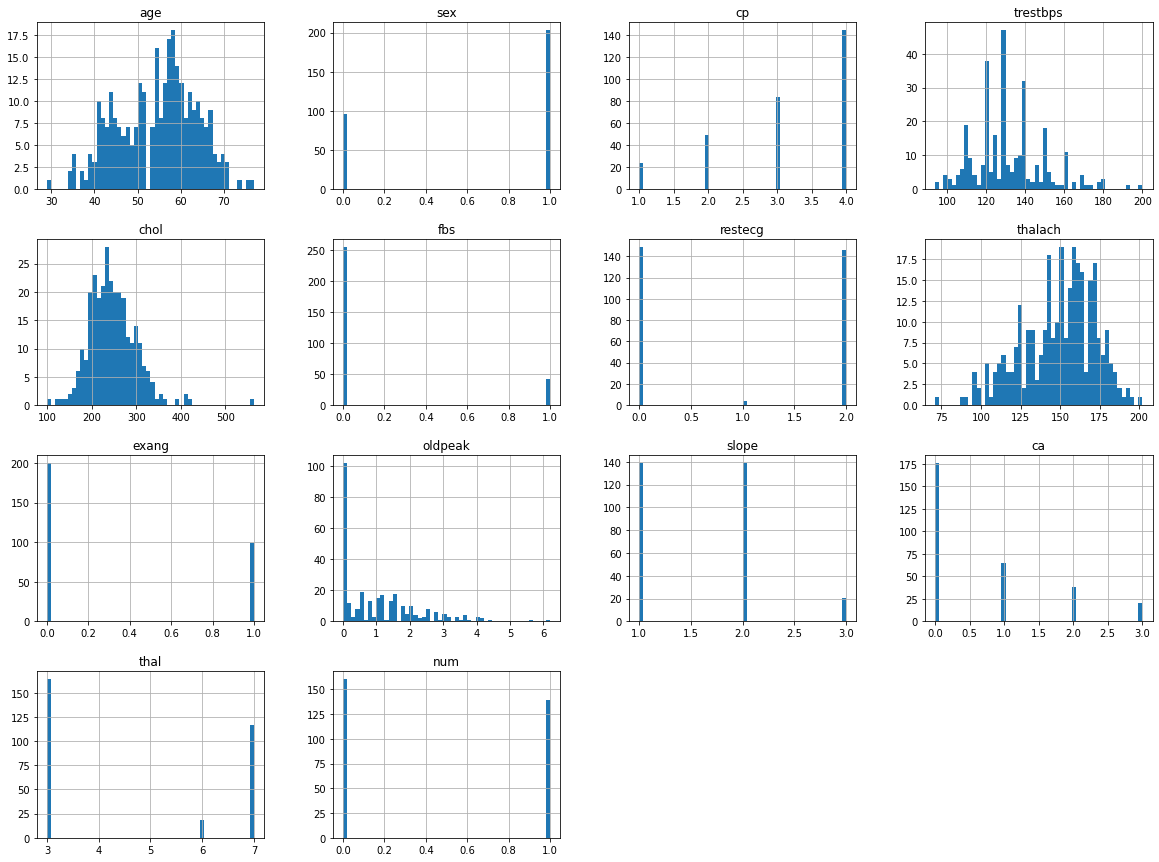

In [57]:
df.hist(bins=50, figsize=(20,15))
plt.show()




#### correlation

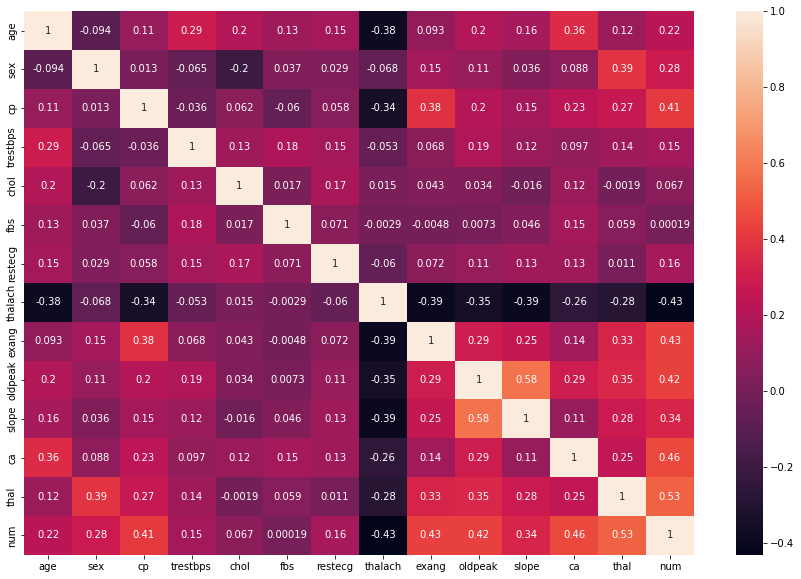

In [58]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [59]:
corr_mat= df.corr()

In [60]:
corr_mat['num'].sort_values(ascending=False)

num         1.000000
thal        0.530603
ca          0.455398
exang       0.427123
oldpeak     0.424947
cp          0.412597
slope       0.335926
sex         0.281912
age         0.223498
restecg     0.157941
trestbps    0.153849
chol        0.067350
fbs         0.000192
thalach    -0.430108
Name: num, dtype: float64

### 2

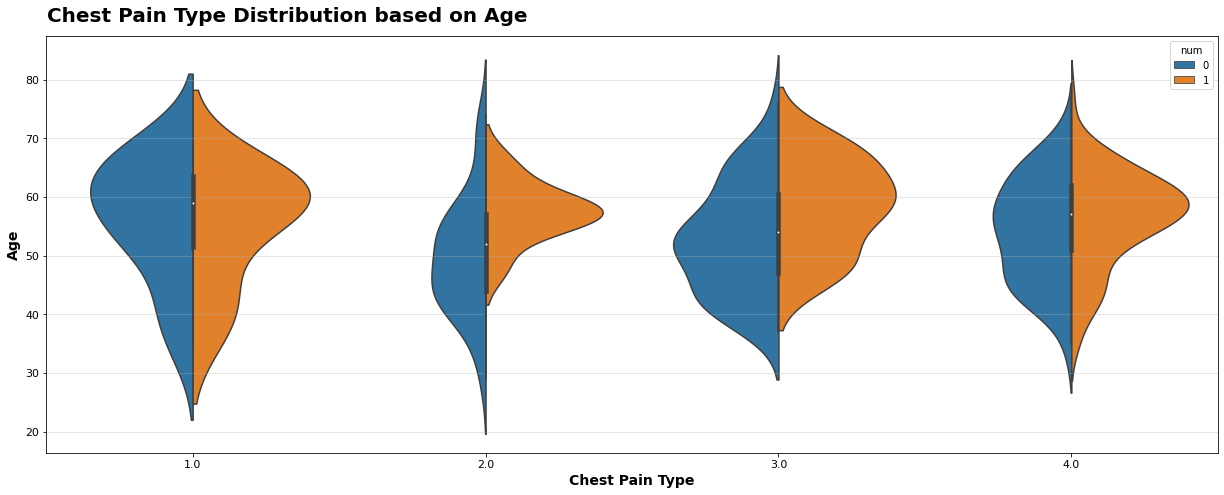

In [61]:
# -- Violin Plot Size & Titles Settings ---
fig, ax = plt.subplots()
fig.set_size_inches(17, 7)
plt.suptitle('Chest Pain Type Distribution based on Age', fontweight='heavy', 
             x=0.028, y=0.98, ha='left', fontsize='20', fontfamily='sans-serif')

plt.tight_layout(rect=[0, 0.04, 1, 1.01])

# --- Creating Violin Plot based on Type ---
sns.violinplot(x='cp', y='age', hue='num', data=df, ax=ax, 
               boxprops=dict(alpha=0.9), linewidth=1.5, 
               split=True)

# --- Violin Plot Legend & Labels Settings ---
# plt.legend(title='$\\bf{Target}$', fontsize='10', title_fontsize='12', frameon=True,
#            loc='upper right')
plt.xlabel('Chest Pain Type', fontweight='bold', fontsize='14', 
           fontfamily='sans-serif')
plt.ylabel('Age', fontweight='bold', fontsize='14'  )
plt.xticks(fontsize='11')
plt.yticks(fontsize='11')
plt.grid(axis='y', alpha=0.4)
plt.show();

- It can be seen that the lowest patient age is in chest pain types 1 and 3. In addition, the age distribution of patients who do not have heart disease is mostly around 60 years old. It can also be\nseen that patients who have heart disease are younger than those who do not have heart disease.', 
         

### based on gender

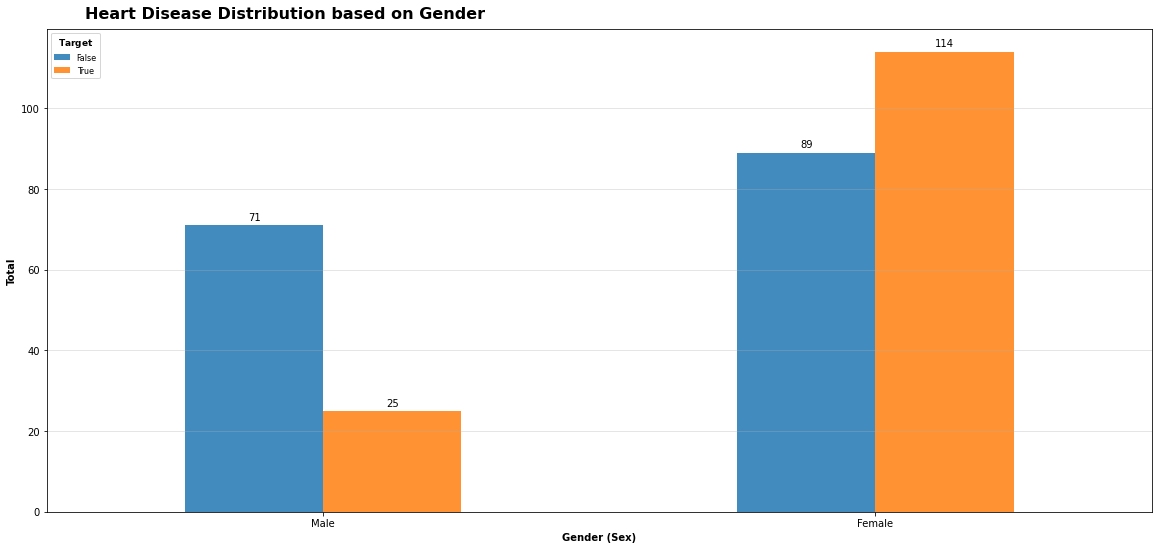

In [62]:
# --- Labels Settings ---
labels = ['False', 'True']
label_gender = np.array([0, 1])
label_gender2 = ['Male', 'Female']

# --- Creating Bar Chart ---
ax = pd.crosstab(df.sex, df.num).plot(kind='bar', figsize=(16, 8), 
                                         alpha=0.85)
# --- Bar Chart Settings ---
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+1.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10)

plt.suptitle('Heart Disease Distribution based on Gender', fontweight='heavy', 
             x=0.065, y=1, ha='left', fontsize='16', fontfamily='sans-serif') 

plt.tight_layout(rect=[0, 0.04, 1, 1.025])

plt.xlabel('Gender (Sex)', fontfamily='sans-serif', fontweight='bold')
plt.ylabel('Total', fontfamily='sans-serif', fontweight='bold')
plt.xticks(label_gender, label_gender2, rotation=0)
plt.grid(axis='y', alpha=0.4)
plt.grid(axis='x', alpha=0)
plt.legend(labels=labels, title='$\\bf{Target}$', fontsize='8', 
           title_fontsize='9', loc='upper left', frameon=True);


- Females are more likely than males to suffer from heart disease. Males have a more balanced distribution than females, who have nearly the same distribution.
       

### age

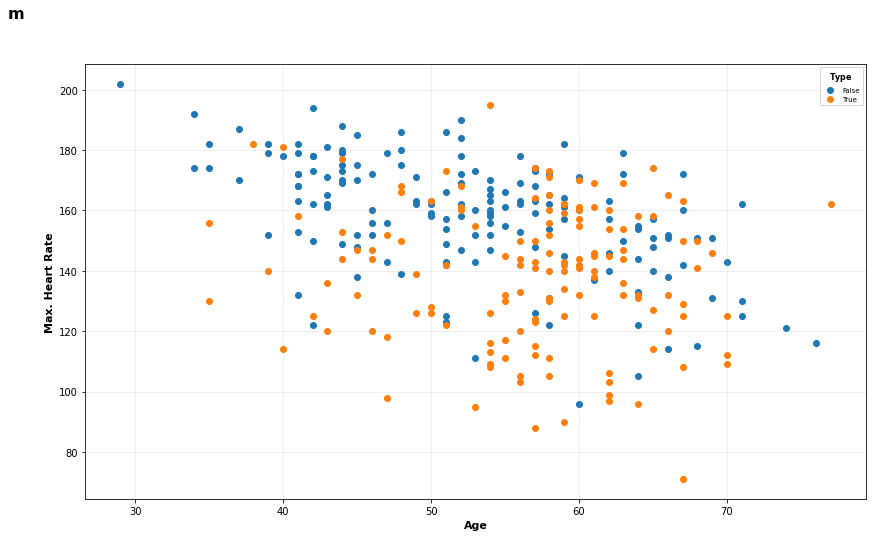

In [63]:
# -- Scatter Plot Size & Titles Settings ---
plt.figure(figsize=(14, 8))
plt.suptitle('m', fontweight='heavy', 
             x=0.048, y=0.98, ha='left', fontsize='16', fontfamily='sans-serif', 
              )

plt.tight_layout(rect=[0, 0.04, 1, 1.01])

# --- Creating Scatter Plot ---
plt.scatter(x=df.age[df.num==0], y=df.thalach[(df.num==0)])
plt.scatter(x=df.age[df.num==1], y=df.thalach[(df.num==1)])

# --- Scatter Plot Legend & Labels Settings ---
plt.legend(['False', 'True'], title='$\\bf{Type}$', fontsize='7', 
           title_fontsize='8', loc='upper right', frameon=True)
plt.xlabel('Age', fontweight='bold', fontsize='11',
           fontfamily='sans-serif')
plt.ylabel('Max. Heart Rate', fontweight='bold', fontsize='11', 
           fontfamily='sans-serif')
plt.ticklabel_format(style='plain', axis='both')
plt.grid(axis='both', alpha=0.4, lw=0.5)
plt.show();

Based on age, patients with and without heart diseases mostly between 54-68 years old. Patients with heart diseases tend to have high heart rate compared to patients with no heart diseases.', 
          

# preparation

In [64]:
df_ = df.copy()

In [65]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42) 
for train_index, test_index in split.split(df_, df_["num"]):
    strat_train_set = df_.iloc[train_index]
    strat_test_set = df_.iloc[test_index]


In [66]:
x_train = strat_train_set.drop(['num'], axis=1)
y_train = strat_train_set["num"].copy()

x_test = strat_test_set.drop("num", axis=1)
y_test = strat_test_set["num"].copy()

feature scaling

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

# split dataset
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42) 
for train_index, test_index in split.split(df_, df_["num"]):
    strat_train_set = df_.iloc[train_index]
    strat_test_set = df_.iloc[test_index]

# share to train and test
x_train = strat_train_set.drop(['num'], axis=1)
y_train = strat_train_set["num"].copy()

x_test = strat_test_set.drop("num", axis=1)
y_test = strat_test_set["num"].copy()

# use pipeline to preprocess the value
num_pipeline = Pipeline([
            ('MinMax_scaler',  MinMaxScaler())
])
minmaxscaler =  MinMaxScaler()

# scale
train_prepared = minmaxscaler.fit_transform(x_train)
test_prepared = minmaxscaler.fit_transform(x_test)


In [69]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
#             ('imputer', SimpleImputer(strategy="median")),
            ('MinMax_scaler',  MinMaxScaler())
        ])
 
    
# train_prepared = num_pipeline.fit_transform(x_train)
# test_prepared = num_pipeline.fit_transform(x_test)

minmaxscaler =  MinMaxScaler()

train_prepared = minmaxscaler.fit_transform(x_train)
test_prepared = minmaxscaler.fit_transform(x_test)



train_prepared[0:2]


array([[0.58139535, 1.        , 1.        , 0.71698113, 0.48706897,
        0.        , 1.        , 0.48598131, 1.        , 0.5483871 ,
        1.        , 0.        , 1.        ],
       [0.48837209, 1.        , 0.33333333, 0.33962264, 0.34913793,
        0.        , 0.        , 0.62616822, 0.        , 0.        ,
        0.        , 0.        , 0.        ]])

# Models

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [71]:
def train_test_acc()

SyntaxError: invalid syntax (4041719049.py, line 1)

In [72]:
train_acc = accuracy_score(training_target, trained_model.predict(training_features))
train_acc = accuracy_score(test_target, predictions)

SyntaxError: invalid syntax (2697491739.py, line 1)

evaluation functions

#### Confusion Matrix

In compared to the real labels, the confusion matrix reveals the corrected and incorrect predictions. It demonstrates the model's ability to forecast or differentiate the classes accurately.

    True Positive – Positive class was successfully predicted by the model to be a positive class.
    False Positive – The model predicted a positive class when it should have been a negative class.
    False Negative – The model expected the positive class to be the negative class.
    True Negative – The model properly predicted the negative class to be the negative class.

In [73]:

from sklearn.metrics import confusion_matrix, \
    ConfusionMatrixDisplay,  classification_report, f1_score, roc_auc_score, roc_curve
    


In [74]:
def computeROCAUC(y_test, y_pred, title=''):
    ROC_AUC = roc_auc_score(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)

    plt.plot([0,1],[0,1], linestyle='--')
    plt.plot(fpr, tpr, marker='.')
    plt.title(f"ROC Curve for {title}, ROC_AUC Score: {ROC_AUC:3.4%}")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()
    
    
# CUSTOM CONFUSION MATRIX PLOT
def plot_confusion(y_test, clf_pred, clf, title=''):
    cm = confusion_matrix(y_test, clf_pred, labels=clf.classes_)
    cmp = ConfusionMatrixDisplay(cm, display_labels=clf.classes_)
    
    # compute the f1score
    f1score = f1_score(y_test, clf_pred)
    
    
    sns.heatmap(cm, annot=True,cmap='Blues',annot_kws={"size": 30})
    plt.title(f"Confusion Matrix for {title} , F1 Score: {f1score:3.4%}")#.format(f1score))
    plt.show()

    print('True Positive:\t{}'.format(cm[0,0]))
    print('True Negative:\t{}'.format(cm[0,1]))
    print('False Positive:\t{}'.format(cm[1,0]))
    print('False Negative:\t{}'.format(cm[1,1]))



In [158]:

def run_model(model, X_train, y_train, X_test, y_test, title):
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('Report:\n{}'.format(classification_report(y_test, y_pred)))
    print('Score: {}'.format(model.score(X_test, y_test)))
    print("\nNumber of mislabeled points out of a total %d points : %d" % (X_test.shape[0],
                                                                       (y_test != y_pred).sum()))
    print()
    
#     train_acc = accuracy_score(y_train, y_pred)
#     train_acc = accuracy_score(y_test, y_pred)
    print('Train Score: {}'.format(accuracy_score(y_train, model.predict(X_train))))
    print('Test Score: {}'.format(accuracy_score(y_test, y_pred)))
    print()
    
    acc = model.score(X_test, y_test)
    
    print()
    print()
    
    # --- Confusion Matrix ---
    plot_confusion(y_test, y_pred, model, title=title)

    print()
    
    print('\n\033[1m'+'.: ROC AUC'+'\033[0m')
    print('*' * 26)
    
    # --- ROC AUC ---
    computeROCAUC(y_test, y_pred, title=title)
    
    return acc





#### K-neighbors


The k-nearest neighbors (KNN) algorithm is a data classification method for predicting whether a data point will belong to one of two groups. It doesn't start building a model until the dataset is queried. KNN is hence suitable for data mining.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

{'knn': [0.8410041841004184, 0.8666666666666667]}

Report:
              precision    recall  f1-score   support

           0       0.83      0.94      0.88        32
           1       0.92      0.79      0.85        28

    accuracy                           0.87        60
   macro avg       0.88      0.86      0.86        60
weighted avg       0.87      0.87      0.87        60

Score: 0.8666666666666667

Number of mislabeled points out of a total 60 points : 8

Train Score: 0.8410041841004184
Test Score: 0.8666666666666667





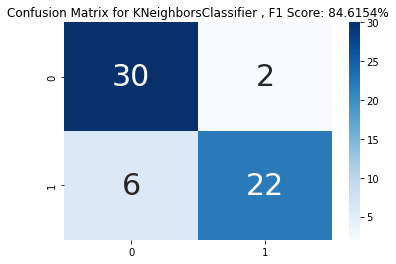

True Positive:	30
True Negative:	2
False Positive:	6
False Negative:	22


.: ROC AUC
**************************


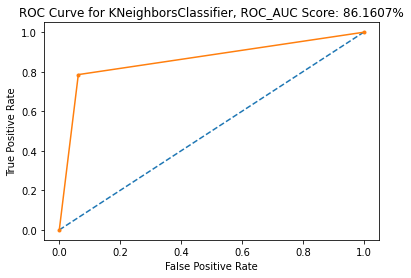

In [159]:
knn = KNeighborsClassifier(n_neighbors=5)
knn_acc = run_model(knn, X_train=train_prepared, y_train=y_train, 
          X_test=test_prepared, y_test=y_test, title='KNeighborsClassifier')


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier



#### SVC

Report:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84        32
           1       0.82      0.82      0.82        28

    accuracy                           0.83        60
   macro avg       0.83      0.83      0.83        60
weighted avg       0.83      0.83      0.83        60

Score: 0.8333333333333334

Number of mislabeled points out of a total 60 points : 10

Train Score: 0.8535564853556485
Test Score: 0.8333333333333334





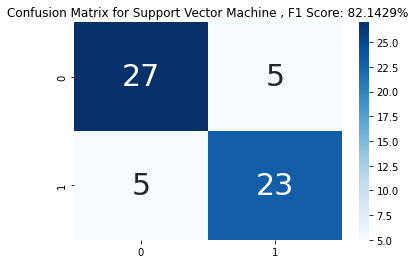

True Positive:	27
True Negative:	5
False Positive:	5
False Negative:	23


.: ROC AUC
**************************


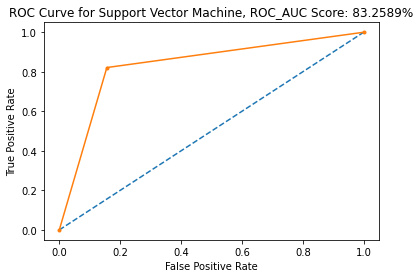

In [160]:
from sklearn.svm import SVC
svc = SVC(kernel='linear', C=4.0, random_state=0)
svc_acc = run_model(svc, X_train=train_prepared, y_train=y_train,
          X_test=test_prepared, y_test=y_test, title='Support Vector Machine')


#### Decision Tree Classifier

Report:
              precision    recall  f1-score   support

           0       0.61      0.72      0.66        32
           1       0.59      0.46      0.52        28

    accuracy                           0.60        60
   macro avg       0.60      0.59      0.59        60
weighted avg       0.60      0.60      0.59        60

Score: 0.6

Number of mislabeled points out of a total 60 points : 24

Train Score: 1.0
Test Score: 0.6





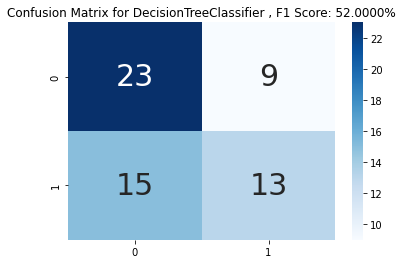

True Positive:	23
True Negative:	9
False Positive:	15
False Negative:	13


.: ROC AUC
**************************


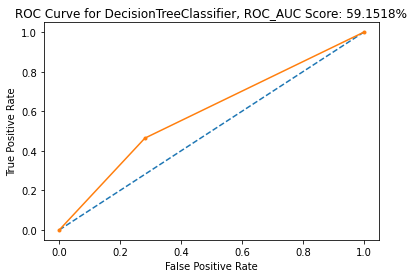

In [161]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=0)
dtc_acc = run_model(dtc, X_train=train_prepared, y_train=y_train,
          X_test=test_prepared, y_test=y_test, title='DecisionTreeClassifier')


In [ ]:
from sklearn.ensemble import RandomForestClassifier

#### Random Forest Classifier

Report:
              precision    recall  f1-score   support

           0       0.79      0.81      0.80        32
           1       0.78      0.75      0.76        28

    accuracy                           0.78        60
   macro avg       0.78      0.78      0.78        60
weighted avg       0.78      0.78      0.78        60

Score: 0.7833333333333333

Number of mislabeled points out of a total 60 points : 13

Train Score: 1.0
Test Score: 0.7833333333333333





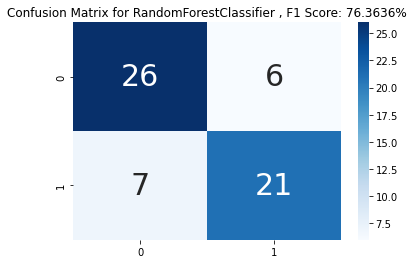

True Positive:	26
True Negative:	6
False Positive:	7
False Negative:	21


.: ROC AUC
**************************


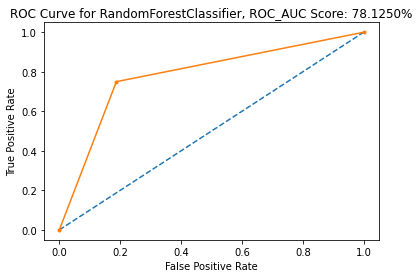

In [162]:
rfc = RandomForestClassifier(random_state=0)
rfc_acc = run_model(rfc, X_train=train_prepared, y_train=y_train,
          X_test=test_prepared, y_test=y_test, title='RandomForestClassifier')


KNeighbor outperformed all the models.

In [ ]:
lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(y_test,logclf_predictions)
nb_false_positive_rate,nb_true_positive_rate,nb_threshold = roc_curve(y_test,naive_predictions)
rf_false_positive_rate,rf_true_positive_rate,rf_threshold = roc_curve(y_test,randfforestclf_predictions)                                                             
knn_false_positive_rate,knn_true_positive_rate,knn_threshold = roc_curve(y_test,knn_predictions)
dt_false_positive_rate,dt_true_positive_rate,dt_threshold = roc_curve(y_test,treeclf_predictions)
svc_false_positive_rate,svc_true_positive_rate,svc_threshold = roc_curve(y_test,svm_predictions)

plt.figure(figsize=(10,5))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
plt.plot(nb_false_positive_rate,nb_true_positive_rate,label='Naive Bayes')
plt.plot(rf_false_positive_rate,rf_true_positive_rate,label='Random Forest')
plt.plot(knn_false_positive_rate,knn_true_positive_rate,label='K-Nearest Neighbor')
plt.plot(dt_false_positive_rate,dt_true_positive_rate,label='Desion Tree')
plt.plot(svc_false_positive_rate,svc_true_positive_rate,label='Support Vector Classifier')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()



In [172]:
def make_predictions(model, X_train, y_train, X_test):
    
    model.fit(X_train, y_train)
    return model.predict(X_test)

In [175]:
def make_roc(X_train, y_train, X_test, models=[knn,svc,dtc,rfc]):
    
    
    
    
    knn_false_positive_rate, knn_true_positive_rate, knn_threshold = roc_curve(y_test, make_predictions(models[0], X_train, y_train, X_test))
    
    svc_false_positive_rate, svc_true_positive_rate,svc_threshold = roc_curve(y_test, make_predictions(models[1], X_train, y_train, X_test))
    
    dtc_false_positive_rate, dtc_true_positive_rate,dtc_threshold = roc_curve(y_test, make_predictions(models[2], X_train, y_train, X_test))
    
    
    rfc_false_positive_rate,  rfc_true_positive_rate, rfc_threshold = roc_curve(y_test, make_predictions(models[3], X_train, y_train, X_test))
    
    
    plt.figure(figsize=(10,5))
    plt.title('Reciver Operating Characterstic Curve')
    plt.plot(knn_false_positive_rate,knn_true_positive_rate,label='K-Nearest Neighbor')
    plt.plot(svc_false_positive_rate,svc_true_positive_rate,label='Support Vector Classifier')
    plt.plot(dtc_false_positive_rate,dtc_true_positive_rate,label='Desion Tree')
    plt.plot(rfc_false_positive_rate,rfc_true_positive_rate,label='Random Forest')
    plt.plot([0,1],ls='--')
    plt.plot([0,0],[1,0],c='.5')
    plt.plot([1,1],c='.5')
    plt.ylabel('True positive rate')
    plt.xlabel('False positive rate')
    plt.legend()
    plt.show()


    

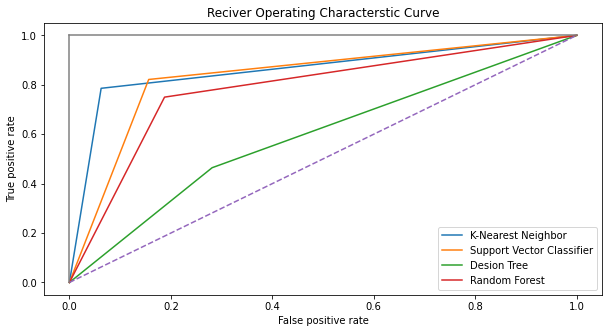

In [177]:
make_roc( X_train=train_prepared, y_train=y_train,
          X_test=test_prepared)

In [163]:
models_acc=[knn_acc, svc_acc, dtc_acc, rfc_acc]



In [164]:
models_acc

[0.8666666666666667, 0.8333333333333334, 0.6, 0.7833333333333333]

In [ ]:
# Get data
x = list(accuracies_for_plot.keys())
y = list(accuracies_for_plot.values())

# Set linear numbers
y_pos = np.arange(len(x))

# increase graph size
plt.figure(figsize=(10,8))

# Create bars
plt.bar(y_pos, y, color=(0.2, 0.4, 0.6, 0.6))

# Create names on the x-axis
plt.xticks(y_pos, x)

plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)

plt.grid()
# Show graphic
plt.show()

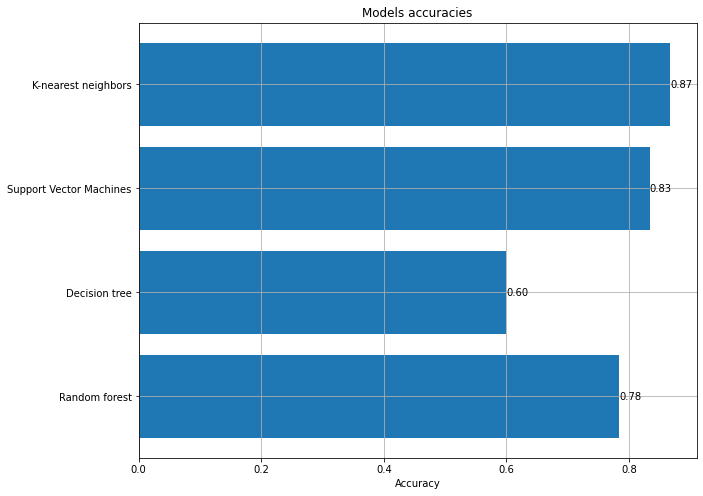

In [171]:

# Example data
people = ('K-nearest neighbors','Support Vector Machines', 'Decision tree', 'Random forest')
y_pos = np.arange(len(people))
performance =  models_acc

fig, ax = plt.subplots(figsize=(10,8))

hbars = ax.barh(y_pos, performance, align='center')
ax.set_yticks(y_pos, labels=people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Accuracy')
ax.set_title('Models accuracies')

# Label with specially formatted floats
ax.bar_label(hbars, fmt='%.2f')
# ax.set_xlim(right=15)  # adjust xlim to fit labels

plt.grid()

plt.show()

In [139]:
import joblib

In [141]:
joblib.dump(minmaxscaler,'deploy/models/minmaxscaler.pkl')
joblib.dump(knn,'deploy/models/knn.pkl')

['deploy/models/knn.pkl']

In [64]:
len(df.columns)

14

In [99]:
dict(df.min()[:-1])

{'age': 29.0,
 'sex': 0.0,
 'cp': 1.0,
 'trestbps': 94.0,
 'chol': 100.0,
 'fbs': 0.0,
 'restecg': 0.0,
 'thalach': 71.0,
 'exang': 0.0,
 'oldpeak': 0.0,
 'slope': 1.0,
 'ca': 0.0,
 'thal': 3.0}

In [88]:
dict(df.max()[:-1])

{'age': 77.0,
 'sex': 1.0,
 'cp': 4.0,
 'trestbps': 200.0,
 'chol': 564.0,
 'fbs': 1.0,
 'restecg': 2.0,
 'thalach': 202.0,
 'exang': 1.0,
 'oldpeak': 6.2,
 'slope': 3.0,
 'ca': 3.0,
 'thal': 7.0}

In [101]:
data_min = {'age': 29.0,
 'sex': 0.0,
 'cp': 1.0,
 'trestbps': 94.0,
 'chol': 100.0,
 'fbs': 0.0,
 'restecg': 0.0,
 'thalach': 71.0,
 'exang': 0.0,
 'oldpeak': 0.0,
 'slope': 1.0,
 'ca': 0.0,
 'thal': 3.0}
 
data_max = {'age': 77.0,
 'sex': 1.0,
 'cp': 4.0,
 'trestbps': 200.0,
 'chol': 564.0,
 'fbs': 1.0,
 'restecg': 2.0,
 'thalach': 202.0,
 'exang': 1.0,
 'oldpeak': 6.2,
 'slope': 3.0,
 'ca': 3.0,
 'thal': 7.0}


In [113]:
'reversable defect'.lower() == 'reversable defect'

True

In [106]:
for mi,ma in zip(data_min.values(), data_max.values()):
    print(mi, '->', ma)
    break

29.0 -> 77.0


In [ ]:
67 1 4 160 286 0.0 2 108 1 1.5 2 3 3

In [109]:
a = [29, 'female', 'typical angina', 0, 0, 'yes', 'normal', 0, 'yes', 0, 'upsloping', 0, 'normal']

In [111]:
a[1:]

['female',
 'typical angina',
 0,
 0,
 'yes',
 'normal',
 0,
 'yes',
 0,
 'upsloping',
 0,
 'normal']

In [107]:
df.query("num==1")

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,1
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,1
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
205,47.0,1.0,4.0,150.0,226.0,0.0,0.0,98.0,1.0,1.5,2.0,0.0,7.0,1


In [90]:
import numpy as np

In [100]:
a = np.arange(29,77.0)
a

array([29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41.,
       42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54.,
       55., 56., 57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67.,
       68., 69., 70., 71., 72., 73., 74., 75., 76.])

In [97]:
np.random.choice(a)

24.0

In [ ]:
random.

In [68]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [69]:
x='buffalo'    
exec("%s = %d" % (x,2))

In [71]:
y = 'ja'

In [76]:
myStr = "domain"
print("The string is:", myStr)


The string is: domain


In [ ]:

import streamlit as st


# import subprocess, os
from helpers import make_predictions

from streamlit_autorefresh import st_autorefresh


def get_pred(msg):
    pred, pred_proba = make_predictions(msg)
    return pred, pred_proba

st.cache() 
def run():
    
    with open('../logs/message.txt', 'r') as f:
        msg = f.read()
        f.close()

    print(msg)

    return msg


# local styling
def local_css(file_name):
    with open(file_name) as f:
        st.markdown(f'<style>{f.read()}</style>', unsafe_allow_html=True)

local_css("style.css")


if __name__ == "__main__":


    # Run the autorefresh about every 2000 milliseconds (2 seconds) and stop
    # after it's been refreshed 100 times.

    count = st_autorefresh(interval=3000, limit=100, key="fizzbuzzcounter")

    st.title('Smshing')
    msg = run()

    sender = msg.split('>')[0]
    message = msg.split('>')[-1]

    st.write(f'[ sender ] > {sender} \n\n[ Message ] > {message}')

    # st.write(msg)
    pred, pred_proba = get_pred(message)
    st.write(f'[ prediction ] > {pred}') # see *
    st.write(f'[ Confidence of ] > {pred_proba}') # see *

    # stop run
    st.stop()

    


